# Mini Project 2 - Investigate Hotel Business using Data Visualization

# Data Preprocessing

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Load Data

In [43]:
df = pd.read_csv('hotel_bookings_data.csv')
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,...,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
0,Resort Hotel,0,342,2017,September,27,1,0,0,2,...,3,No Deposit,NaN,NaN,0,Personal,0.0,0,0,Check-Out
1,Resort Hotel,0,737,2017,September,27,1,0,0,2,...,4,No Deposit,NaN,NaN,0,Personal,0.0,0,0,Check-Out
2,Resort Hotel,0,7,2017,September,27,1,0,1,1,...,0,No Deposit,NaN,NaN,0,Personal,75.0,0,0,Check-Out
3,Resort Hotel,0,13,2017,September,27,1,0,1,1,...,0,No Deposit,304.0,NaN,0,Personal,75.0,0,0,Check-Out
4,Resort Hotel,0,14,2017,September,27,1,0,2,2,...,0,No Deposit,240.0,NaN,0,Personal,98.0,0,1,Check-Out


In [44]:
columns_sisa = ['adults','children','babies','meal','city','market_segment','distribution_channel','is_repeated_guest','previous_cancellations','previous_bookings_not_canceled']
df[columns_sisa].head()

,adults,children,babies,meal,city,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled
0,2,0.0,0,Breakfast,Kota Denpasar,Direct,Direct,0,0,0
1,2,0.0,0,Breakfast,Kota Denpasar,Direct,Direct,0,0,0
2,1,0.0,0,Breakfast,Kabupaten Bangka,Direct,Direct,0,0,0
3,1,0.0,0,Breakfast,Kabupaten Bangka,Corporate,Corporate,0,0,0
4,2,0.0,0,Breakfast,Kabupaten Bangka,Online TA,TA/TO,0,0,0


## 1. Mengatasi Data Null

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 29 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_weekdays_nights        119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [46]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_weekdays_nights               0
adults                                 0
children                               4
babies                                 0
meal                                   0
city                                 488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
booking_changes                        0
deposit_type                           0
agent                              16340
company                           112593
days_in_waiting_list                   0
customer_type   

Ditemukan missing values pada kolom 'city', 'agent', dan 'company'. Karena missing values dalam kolom-kolom tersebut cukup banyak, maka kolom yang berisikan data numerikal akan dilakukan replace data dengan mengisi data null dengan nilai median. Sedangkan kolom yang berisikan data kategorikal akan dilakukan replace data dengan mengisi data null dengan nilai modus dari kolom tersebut.

In [47]:
# Replace missing values di kolom numerikal dengan nilai median
df['agent'] = df['agent'].fillna(df['agent'].median())
df['company'] = df['company'].fillna(df['company'].median())

# Replace missing values di kolom ketegorikal dengan nilai modus
df['city'] = df['city'].fillna(df['city'].mode()[0])

In [48]:
# Pengecekan ulang missing values
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_weekdays_nights          0
adults                            0
children                          4
babies                            0
meal                              0
city                              0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

Missing value sudah tidak ada.

## 2. Mengganti Value Tidak Sesuai

In [49]:
# Melihat values di kolom 'meal'
df['meal'].value_counts()

meal
Breakfast     92310
Dinner        14463
No Meal       10650
Undefined      1169
Full Board      798
Name: count, dtype: int64

Karena data yang ada di dalam kolom 'meal' kurang sesuai dengan data meal plan yang biasanya ada pada data booking hotel. Maka dari itu, data akan diubah untuk menyesuaikan dengan bahasa yang lebih banyak digunakan sebagai standar data booking hotel sebagai berikut:
- Breakfast: Bed & Breakfast (BB)
- Dinner: Half Board (HB)
- Full Board: Full Board (FB)
- No Meal: Self-Catering (SC)
- Undefined: Undefined

In [50]:
# Mengubah value data menjadi lebih sesuai
df['meal'] = np.where(df['meal'] == 'Breakfast', 'BB', df['meal'])
df['meal'] = np.where(df['meal'] == 'Dinner', 'HB', df['meal'])
df['meal'] = np.where(df['meal'] == 'Full Board', 'FB', df['meal'])
df['meal'] = np.where(df['meal'] == 'No Meal', 'SC', df['meal'])
df['meal'] = np.where(df['meal'] == 'Undefined', 'Undefined', df['meal'])

In [51]:
# Lakukan pengecekan isi value yang sudah diubah
df['meal'].value_counts()

meal
BB           92310
HB           14463
SC           10650
Undefined     1169
FB             798
Name: count, dtype: int64

Values dari kolom 'meal' sudah berubah dan lebih sesuai.

## 3. Membuang Data Tidak Diperlukan

Pertama, jumlah total tamu perlu dihitung terlebih dahulu dengan menambah jumlah tamu dewasa (adult), tamu anak-anak (children), tamu bayi (babies) ke dalam kolom baru 'total_guests'. <br>
Sebelum menghitung total jumlah tamu, tipe data di kolom 'children' akan diubah dari float menjadi integer. Namun, karena terdapat data infinite di kolom tersebut, maka data infinite perlu diubah menjadi data null dan data null diubah menjadi data median di kolom tersebut terlebih dahulu.

In [52]:
# Mengubah data infinite menjadi data null
df['children'].replace([np.inf, -np.inf], np.nan, inplace=True)

# Mengubah data null jadi data median
df['children'] = df['children'].fillna(df['children'].median())

# Mengubah tipe data menjadi integer
df['children'] = df['children'].astype(int)

In [53]:
# Membuat kolom baru berisi total jumlah tamu
df['total_guests'] = df['adults'] + df['children'] + df['babies']

In [54]:
df['total_guests'].value_counts()

total_guests
2     82051
1     22581
3     10495
4      3929
0       180
5       137
26        5
12        2
27        2
20        2
10        2
40        1
50        1
55        1
6         1
Name: count, dtype: int64

Karena terdapat total jumlah tamu yang berisi 0 tamu, maka akan dilakukan filtering untuk membuang data tersebut karena data tersebut tidak sesuai.

In [55]:
# Melakukan filtering untuk membuang data berisi 0
df = df[df['total_guests'] > 0]

# Melakukan pengecekan value
df['total_guests'].value_counts()

total_guests
2     82051
1     22581
3     10495
4      3929
5       137
26        5
12        2
27        2
20        2
10        2
40        1
50        1
55        1
6         1
Name: count, dtype: int64

Data yang berisikan 0 tamu sudah dibuang.

# Monthly Hotel Booking Analysis Based On Hotel Type

## 1. Tabel Agregat Perbandingan Jumlah Pemesanan Hotel Tiap Bulan

In [56]:
# Membuat tabel agregat data booking berdasarkan tahun, bulan, dan tipe hotel
df_agg = df.groupby(['arrival_date_year', 'arrival_date_month', 'hotel']).size().reset_index(name='bookings')
df_agg

,arrival_date_year,arrival_date_month,hotel,bookings
0,2017,December,City Hotel,3382
1,2017,December,Resort Hotel,1569
2,2017,February,City Hotel,1649
3,2017,February,Resort Hotel,1264
4,2017,January,City Hotel,1233
5,2017,January,Resort Hotel,1104
6,2017,November,City Hotel,3524
7,2017,November,Resort Hotel,1585
8,2017,October,City Hotel,2474
9,2017,October,Resort Hotel,1409


In [57]:
# Melakukan pivot tabel
df_pivot = df_agg.pivot_table(index=['arrival_date_year', 'arrival_date_month'], columns='hotel', values='bookings', fill_value=0)
df_pivot

hotel                                 City Hotel  Resort Hotel
arrival_date_year arrival_date_month                          
2017              December                  3382          1569
                  February                  1649          1264
                  January                   1233          1104
                  November                  3524          1585
                  October                   2474          1409
                  September                 1396          1378
2018              April                     2365          1519
                  August                    3921          1369
                  December                  4212          1984
                  February                  2465          1381
                  January                   3103          1331
                  July                      3673          1802
                  June                      3558          1867
                  March                     1364           884
                  May                       3041          1778
                  November                  3868          1523
                  October                   3370          1685
                  September                 3119          1441
2019              April                     2585          1583
                  August                    3964          1675
                  July                      4548          1757
                  June                      3911          1742
                  March                     2366          1307
                  May                       3393          1556
                  October                   3123          1800
                  September                 3556          1754

Tabel pivot dibuat agar data agregat sebelumnya terlihat lebih rapi dan terstruktur. <br>
Berdasarkan tabel pivot, data yang lengkap untuk setiap bulannya adalah di tahun 2018.

## 2. Normalisasi Data

Berdasarkan data yang sudah dibuat menjadi tabel pivot sebelumnya, tidak ada data yang menunjukkan skala ekstrim ataupun rentang angka yang jauh berbeda. Maka, normalisasi data tidak perlu dilakukan.

## 3. Mengurutkan Data

Agar data bulan bisa diurutkan secara efektif, data di kolom 'arrival_date_month' perlu diubah menjadi data ketegorikal terlebih dahulu.

In [58]:
# Mengecek tipe data sebelum diubah
print(df['arrival_date_month'].dtype)

object


In [59]:
# Mengubah kolom 'arrival_date_month' menjadi kategorikal
months = ['January', 'February', 'March', 'April', 'May', 'June', 
        'July', 'August', 'September', 'October', 'November', 'December']
df['arrival_date_month'] = pd.Categorical(df['arrival_date_month'], categories=months, ordered=True)

# Mengecek perubahan tipe da
print(df['arrival_date_month'].dtype)

category


Berdasarkan data tabel pivot sebelumnya, data dari tahun 2018 memiliki data yang lengkap setiap bulannya. Maka data tahun 2018 akan dipilih untuk analisis selanjutnya.

In [60]:
# Memilih data tahun 2018
df_2018 = df[df['arrival_date_year'] == 2018]

# Tabel agregat untuk tahun 2018
df18 = df_2018.groupby(['arrival_date_month', 'hotel']).size().unstack()

# Menampilkan tabel
df18

hotel,City Hotel,Resort Hotel
arrival_date_month,,
January,3103,1331
February,2465,1381
March,1364,884
April,2365,1519
May,3041,1778
June,3558,1867
July,3673,1802
August,3921,1369
September,3119,1441


## 4. Membuat Plot Grafik Pertumbuhan Pemesanan Hotel

Data tahun 2018 sebelumnya yang dibuat dalam bentuk tabel pivot perlu diubah agar memudahkan saat digunakan untuk dibuat menjadi sebuah plot grafik.

In [61]:
# Melakukan reset index untuk mengubah nama kolom
data18 = df18.reset_index()

# Mngubah nama kolom
data18.columns = ['month','city_hotel','resort_hotel']

# Menampilkan tabel
data18

,month,city_hotel,resort_hotel
0,January,3103,1331
1,February,2465,1381
2,March,1364,884
3,April,2365,1519
4,May,3041,1778
5,June,3558,1867
6,July,3673,1802
7,August,3921,1369
8,September,3119,1441
9,October,3370,1685


#### Plot Grafik

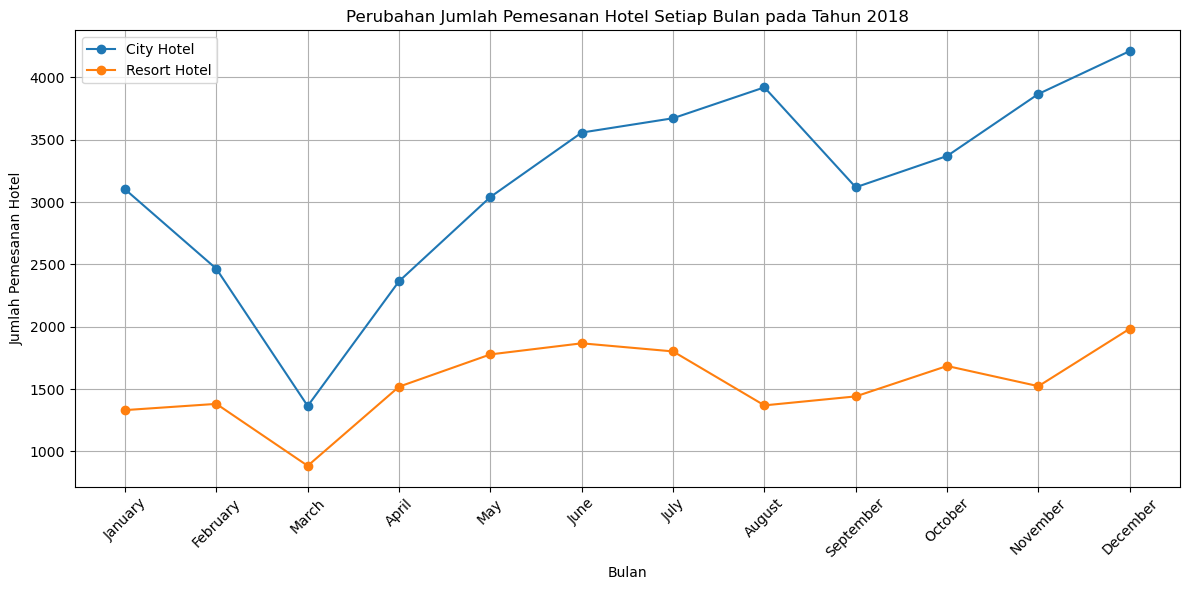

In [62]:
# Membuat plot
plt.figure(figsize=(12,6))
plt.plot(data18['month'], data18['city_hotel'], marker='o', label='City Hotel')
plt.plot(data18['month'], data18['resort_hotel'], marker='o', label='Resort Hotel')

plt.xticks(rotation=45)
plt.xlabel('Bulan')
plt.ylabel('Jumlah Pemesanan Hotel')
plt.title('Perubahan Jumlah Pemesanan Hotel Setiap Bulan pada Tahun 2018')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## 5. Interpretasi Plot

Berdasarkan hasil plot diatas, bisa dsimpulkan bahwa:
- Ada fluktuasi jumlah pemesanan yang cukup besar untuk City Hotel, namun jumlah pemesanan cenderung stabil untuk Resort Hotel.
- Ada puncak pemesanan di bulan-bulan tertentu pada City Hotel yang mungkin berkaitan dengan waktu liburan. Kenaikan ada di bulan Juni hingga Agustus, yang mungkin disebabkan libur Hari Raya Idul Fitri 1439H di Bulan Juni, serta libur Hari Kemerdekaan Indonesia dan Hari Raya Idul Adha 1439H di Bulan Agustus.
- Penurunan terjadi setelah bulan Agustus, namun mengalami kenaikan lagi hingga bulan Desember yang memiliki libur Hari Raya Natal dan Tahun Baru.


# Impact Analysis Of Stay Duration On Hotel Bookings Cancellation Rates

## 1. Membuat Kolom Baru

Perlu adanya kolom baru yang berisi total durasi penginapan bernama di hotel agar bisa dianalisis lebih lanjut mengenai tingkat pembatalan penginapan hotel. Kolom baru yang dinamakan 'total_stays' merupakan data kolom 'stays_in_weekend_nights' ditambah data kolom 'stays_in_weekdays_nights'.

In [63]:
# Membuat kolom baru untuk total durasi menginap
df['total_stays'] = df['stays_in_weekend_nights'] + df['stays_in_weekdays_nights']
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,total_guests,total_stays
0,Resort Hotel,0,342,2017,September,27,1,0,0,2,...,14.0,179.0,0,Personal,0.0,0,0,Check-Out,2,0
1,Resort Hotel,0,737,2017,September,27,1,0,0,2,...,14.0,179.0,0,Personal,0.0,0,0,Check-Out,2,0
2,Resort Hotel,0,7,2017,September,27,1,0,1,1,...,14.0,179.0,0,Personal,75.0,0,0,Check-Out,1,1
3,Resort Hotel,0,13,2017,September,27,1,0,1,1,...,304.0,179.0,0,Personal,75.0,0,0,Check-Out,1,1
4,Resort Hotel,0,14,2017,September,27,1,0,2,2,...,240.0,179.0,0,Personal,98.0,0,1,Check-Out,2,2


## 2. Mengelompokkan Nilai dari Kolom Baru

Kolom baru yang berisi tentang total durasi penginapan perlu dikelompokkan secara signifikan untuk membantu proses analisis data agar lebih efektif.<br>
Total durasi penginapan akan dikelompokkan menjadi:
- Short Stay: menginap selama 2 malam
- Medium Stay: menginap selama 6 malam
- Long Stay: menginap selama 13 malam
- Very Long Stay: menginap lebih dari 13 malam

In [64]:
# Mengelompokkan total durasi penginapan
df['stay_duration'] = np.where(df['total_stays'] <= 2, 'Short Stay',
                      np.where(df['total_stays'] <= 6, 'Medium Stay',
                      np.where(df['total_stays'] <= 13, 'Long Stay',
                      'Very Long Stay')))
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,...,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,total_guests,total_stays,stay_duration
0,Resort Hotel,0,342,2017,September,27,1,0,0,2,...,179.0,0,Personal,0.0,0,0,Check-Out,2,0,Short Stay
1,Resort Hotel,0,737,2017,September,27,1,0,0,2,...,179.0,0,Personal,0.0,0,0,Check-Out,2,0,Short Stay
2,Resort Hotel,0,7,2017,September,27,1,0,1,1,...,179.0,0,Personal,75.0,0,0,Check-Out,1,1,Short Stay
3,Resort Hotel,0,13,2017,September,27,1,0,1,1,...,179.0,0,Personal,75.0,0,0,Check-Out,1,1,Short Stay
4,Resort Hotel,0,14,2017,September,27,1,0,2,2,...,179.0,0,Personal,98.0,0,1,Check-Out,2,2,Short Stay


## 3. Membuat Tabel Agregat Perbandingan Jumlah Pemesanan Hotel yang Dibatalkan

Ada beberapa kolom baru yang dibutuhkan untuk bisa melihat perbandingan jumlah pemesanan hotel yang dibatalkan:
- 'total_booking' = untuk melihat total pemesanan hotel secara keseluruhan (menggunakan count untuk menghitung jumlah data di kolom 'is_canceled')
- 'total_canceled' = untuk melihat total pemesanan yang dibatalkan saja (menggunakan sum untuk menjumlahkan seluruh data 1 di kolom 'is_canceled' yang berarti pesanan yang dibatalkan)

In [65]:
# Membuat tabel agregat
df_agg2 = df.groupby(['hotel', 'stay_duration']).agg(
    total_booking=('is_canceled', 'count'),
    total_canceled=('is_canceled', 'sum')
).reset_index()

# Menampilkan tabel
df_agg2

,hotel,stay_duration,total_booking,total_canceled
0,City Hotel,Long Stay,3025,1295
1,City Hotel,Medium Stay,40952,17048
2,City Hotel,Short Stay,34937,14548
3,City Hotel,Very Long Stay,249,188
4,Resort Hotel,Long Stay,9507,3053
5,Resort Hotel,Medium Stay,15102,4849
6,Resort Hotel,Short Stay,14345,2907
7,Resort Hotel,Very Long Stay,1093,311


## 4. Membuat Plot Rasio Pembatalan Pemesanan terhadap Durasi Penginapan

Pertama, perlu membuat kolom baru berisikan angka rasio untuk pesanan yang dibatalkan bagi setiap durasi penginapan. Untuk mendapatkan angka rasio tersebut, bisa dilakukan total pemesanan yang dibatalkan ('total_canceled') dibagi dengan total jumlah pemesanan hotel ('total_booking').

In [66]:
# Membuat tabel baru berisi rasio pembatalan pemesanan
df_agg2['canceled_ratio'] = df_agg2['total_canceled'] / df_agg2['total_booking']

#Menampilkan tabel
df_agg2

,hotel,stay_duration,total_booking,total_canceled,canceled_ratio
0,City Hotel,Long Stay,3025,1295,0.428099
1,City Hotel,Medium Stay,40952,17048,0.416292
2,City Hotel,Short Stay,34937,14548,0.416407
3,City Hotel,Very Long Stay,249,188,0.755020
4,Resort Hotel,Long Stay,9507,3053,0.321132
5,Resort Hotel,Medium Stay,15102,4849,0.321083
6,Resort Hotel,Short Stay,14345,2907,0.202649
7,Resort Hotel,Very Long Stay,1093,311,0.284538


Setelah ditemukan angka rasionya, bisa dilakukan analisis lebih lanjut untuk membuat sebuah plot yang menunjukkan rasio pembatalan pemesanan terhadap durasi penginapan.

#### Plot

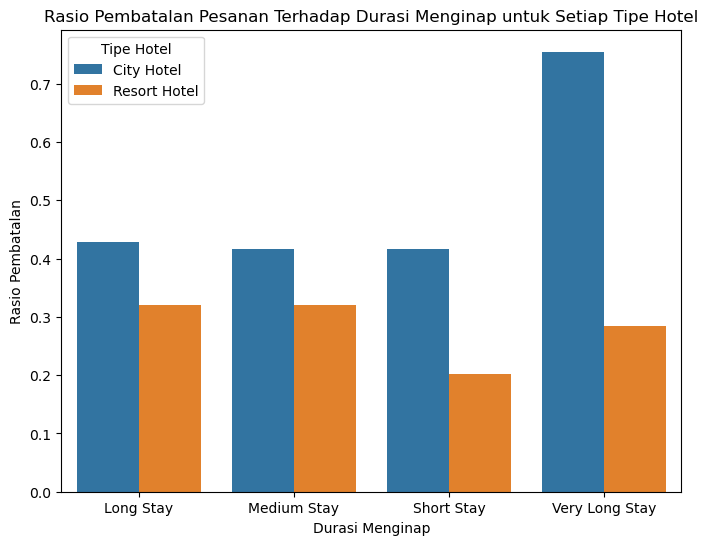

In [67]:
# Membuat plot
plt.figure(figsize=(8, 6))
sns.barplot(x='stay_duration', y='canceled_ratio', hue='hotel', data=df_agg2)
plt.title('Rasio Pembatalan Pesanan Terhadap Durasi Menginap untuk Setiap Tipe Hotel')
plt.xlabel('Durasi Menginap')
plt.ylabel('Rasio Pembatalan')
plt.legend(title='Tipe Hotel')
plt.show()

## 5. Interpretasi Plot

Dari grafik tersebut dapat disimpulkan bahwa:
- City Hotel memiliki rasio pembatalan yang cukup tinggi ketika durasi menginap yang sangat lama yaitu lebih dari 2 minggu, namun memiliki rasio pembatalan yang serupa untuk durasi penginapan 3 hari sampai 2 minggu. Tamu yang memesan untuk durasi singkat lebih konsisten dengan rencana penginapan mereka.
- Resort Hotel memiliki rasio pembatalan yang cukup serupa untuk setiap durasi penginapan, tetapi memiliki rasio pembatalan yang rendah untuk durasi penginapan kurang dari 3 hari. Namun rasio pembatalan untuk Resort Hotel cenderung lebih rendah dari pada City Hotel yang mungkin menunjukkan bahwa tamu Resort Hotel lebih konsisten dengan rencana penginapan mereka secara keseluruhan tanpa terlalu melihat durasi penginapan.

# Impact Analysis Of Lead Time On Hotel Bookings Cancellation Rate

## 1. Mengelompokkan Pemesanan berdasarkan Jarak Waktu

Agar data pemesanan berdasarkan jarak waktu bisa dianalisis lebih lanjut, perlu dikelompokkan terlebih dahulu menjadi beberapa kategori jarak waktu pemesanan, yaitu:
- '<1 month' : kurang dari 30 hari
- '1-3 months' : 31-90 hari
- '3-6 months' : 91-180 hari
- '6-12 months' : 181-365 hari
- '>1 year' : lebih dari 1 tahun

In [68]:
# Mengelompokkan jarak waktu pemesanan
df['lead_time_category'] = np.where(df['lead_time'] < 30, '<1 month',
                          np.where(df['lead_time'] <= 90, '1-3 months',
                          np.where(df['lead_time'] <= 180, '3-6 months',
                          np.where(df['lead_time'] <= 365, '6-12 months',
                          '>1 year'))))
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,...,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,total_guests,total_stays,stay_duration,lead_time_category
0,Resort Hotel,0,342,2017,September,27,1,0,0,2,...,0,Personal,0.0,0,0,Check-Out,2,0,Short Stay,6-12 months
1,Resort Hotel,0,737,2017,September,27,1,0,0,2,...,0,Personal,0.0,0,0,Check-Out,2,0,Short Stay,>1 year
2,Resort Hotel,0,7,2017,September,27,1,0,1,1,...,0,Personal,75.0,0,0,Check-Out,1,1,Short Stay,<1 month
3,Resort Hotel,0,13,2017,September,27,1,0,1,1,...,0,Personal,75.0,0,0,Check-Out,1,1,Short Stay,<1 month
4,Resort Hotel,0,14,2017,September,27,1,0,2,2,...,0,Personal,98.0,0,1,Check-Out,2,2,Short Stay,<1 month


## 2. Membuat Tabel Agregat perbandingan Jumlah Pemesanan Hotel yang Dibatalkan terhadap Jarak Waktu Pemesanan

- Untuk bisa dianalisis lebih lanjut, perlu dilakukan agregat untuk membuat tabel baru untuk bisa melihat perbandingan jumlah pemesanan hotel yang dibatalka dengan jarak waktu pemesanan.
- Seperti sebelumnya, untuk melihat perbandingan jumlah pemesanan hotel yang dibatalkan perlu membuat beberapa kolom baru, yaitu 'total_booking' untuk melihat total pemesanan hotel dan 'total_canceled' untuk melihat total pemesanan yang dibatalkan.
- Sebelum itu, kolom 'lead_time_category' perlu diubah tipe datanya agar bisa diurutkan dengan baik berdasarkan interval waktu.

In [69]:
# Mengurutkan lead_time_category
df['lead_time_category'] = pd.Categorical(df['lead_time_category'], categories=['<1 month', '1-3 months', '3-6 months', '6-12 months', '>1 year'], ordered=True)

# Membuat tabel agregat
df_agg3 = df.groupby(['hotel', 'lead_time_category']).agg(
    total_booking=('is_canceled', 'count'),
    total_canceled=('is_canceled', 'sum')
).reset_index()

# Menampilkan tabel
df_agg3

,hotel,lead_time_category,total_booking,total_canceled
0,City Hotel,<1 month,22809,5000
1,City Hotel,1-3 months,21211,8484
2,City Hotel,3-6 months,18206,8744
3,City Hotel,6-12 months,14234,8929
4,City Hotel,>1 year,2703,1922
5,Resort Hotel,<1 month,15113,1925
6,Resort Hotel,1-3 months,8976,2900
7,Resort Hotel,3-6 months,8214,3075
8,Resort Hotel,6-12 months,7300,3013
9,Resort Hotel,>1 year,444,207


## 3. Membuat Plot Rasio Pembatalan Pesanan terhadap Jarak Waktu Pemesanan

Seperti bagian sebelumnya, untuk membuat plot yang menunjukkan rasio pembatalan pemesanan, diperlukan angka rasio pembatalan pemesanan terlebih daulu. Angka rasio ini dibuat pada kolom baru 'canceled_ratio' yang berisikan 'total_canceled' dibagi dengan 'total_boking'.

In [70]:
# Membuat tabel baru berisi rasio pembatalan pemesanan
df_agg3['canceled_ratio'] = df_agg3['total_canceled'] / df_agg3['total_booking']

#Menampilkan tabel
df_agg3

,hotel,lead_time_category,total_booking,total_canceled,canceled_ratio
0,City Hotel,<1 month,22809,5000,0.219212
1,City Hotel,1-3 months,21211,8484,0.399981
2,City Hotel,3-6 months,18206,8744,0.480281
3,City Hotel,6-12 months,14234,8929,0.627301
4,City Hotel,>1 year,2703,1922,0.711062
5,Resort Hotel,<1 month,15113,1925,0.127374
6,Resort Hotel,1-3 months,8976,2900,0.323084
7,Resort Hotel,3-6 months,8214,3075,0.374361
8,Resort Hotel,6-12 months,7300,3013,0.412740
9,Resort Hotel,>1 year,444,207,0.466216


#### Plot

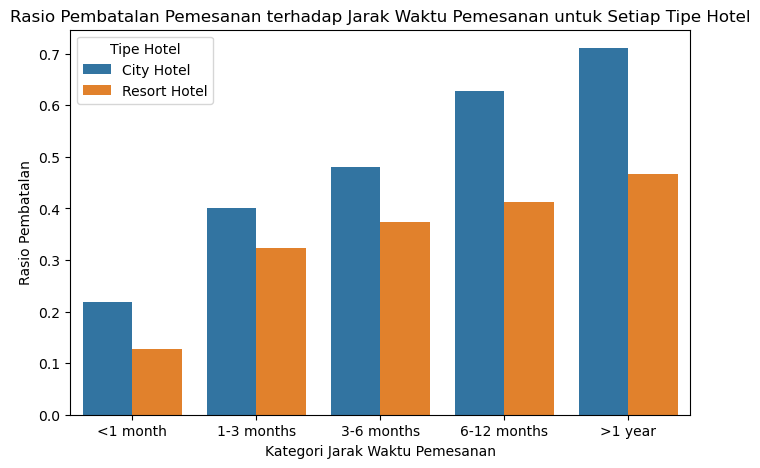

In [71]:
# Membuat plot
plt.figure(figsize=(8, 5))
sns.barplot(data=df_agg3, x='lead_time_category', y='canceled_ratio', hue='hotel')
plt.title('Rasio Pembatalan Pemesanan terhadap Jarak Waktu Pemesanan untuk Setiap Tipe Hotel')
plt.xlabel('Kategori Jarak Waktu Pemesanan')
plt.ylabel('Rasio Pembatalan')
plt.legend(title='Tipe Hotel')
plt.show()

## Interpretasi Plot

Dari grafik barplot diatas, bisa disimpulkan bahwa:
- Secara keseluruhan, semakin jauh jarak waktu pemesanan, semakin tinggi kemungkinan pemesanan untuk dibatalkan bagi City Hotel maupun Resort Hotel. 
- Resort Hotel memiliki tingkat pembatalan pemesanan yang lebih rendah dibandingkan dengan City Hotel jika dilihat secara keseluruhan.
- Tamu yang memesan hotel dalam jarak waktu dekat memiliki kecenderungan untuk lebih konsisten dengan rencana mereka, dibandingkan tamu yang memesan hotel dalam jarak waktu yang jauh. Hal ini menunjukkan bahwa seiring waktu, faktor yang menyebabkan tamu untuk mengubah rencana juga semakin banyak.